In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

%config InlineBackend.figure_format = 'svg'

In [2]:
def getHyperrectangleEdges(sideLengths):
    edges = []

    for edgeDimension in xrange(len(sideLengths)):
        for otherCoordinates in itertools.product(*[[0, sideLength]
                                                    for otherDimension, sideLength 
                                                    in enumerate(sideLengths)
                                                    if otherDimension != edgeDimension]):
            
            start = list(otherCoordinates)
            start.insert(edgeDimension, 0)
            end = list(start)
            end[edgeDimension] = sideLengths[edgeDimension]
            edges.append((tuple(start), tuple(end)))
            
    return edges

def printSteps(steps, A, L, phr, zoomOut=False):
    numModules = len(A)
    fig, axes = plt.subplots(numModules, len(steps), figsize=(len(steps)*6,numModules*5))
    for t, (x0, dims) in enumerate(steps):
        vertices = x0 + np.array(list(itertools.product(*[[0, dim]
                                                          for dim in dims])), dtype="float")

        edges = x0 + np.array(getHyperrectangleEdges(dims))

        for iModule, (P, L) in enumerate(zip(A, L)):
            if len(steps) == 1:
                ax = axes[iModule]
            else:
                ax = axes[iModule, t]

            verticesOnPlane = np.matmul(P, vertices.T)

            bottomLeft = np.min(verticesOnPlane, axis=1) - phr/2
            topRight = np.max(verticesOnPlane, axis=1) + phr/2

            boundingPoints = np.array([bottomLeft,
                                       [bottomLeft[0], topRight[1]],
                                       [topRight[0], bottomLeft[1]],
                                       topRight]).T

            boundingPointsInLatticeBasis = np.matmul(np.linalg.inv(L), boundingPoints)
            bottomLeftInLattice = np.ceil(np.min(boundingPointsInLatticeBasis, axis=1)).astype('int')
            topRightInLattice = np.floor(np.max(boundingPointsInLatticeBasis, axis=1)).astype('int')

            planePoints = np.array([np.matmul(L, [latticePointX, latticePointY])
                                    for latticePointX in xrange(bottomLeftInLattice[0], topRightInLattice[0] + 1)
                                    for latticePointY in xrange(bottomLeftInLattice[1], topRightInLattice[1] + 1)])

            for px, py in planePoints:
                circle = Circle((px, py), phr/2, facecolor='none',
                                edgecolor=(0, 0.8, 0.8), linewidth=3, alpha=0.5)
                ax.add_patch(circle)

            for vertex1, vertex2 in edges:
                v1 = np.matmul(P, vertex1)
                v2 = np.matmul(P, vertex2)

                ax.plot([v1[0], v2[0]], [v1[1], v2[1]], 'k-', lw=1)

            ax.set_aspect(1.0)

            if not zoomOut:
                xlim = np.array([verticesOnPlane.min(axis=1)[0], verticesOnPlane.max(axis=1)[0]])
                w = verticesOnPlane.max(axis=1)[0] - verticesOnPlane.min(axis=1)[0]
                xlim[0] -= w
                xlim[1] += w

                ylim = [verticesOnPlane.min(axis=1)[1], verticesOnPlane.max(axis=1)[1]]
                ylim[0] -= w
                ylim[1] += w

                ax.set_xlim(xlim)
                ax.set_ylim(ylim)

    plt.show()

In [3]:
A = np.array([[[0.3219036345786383, -0.5715108200503918],[0.38397448074511314, 0.10075272793446001]], [[0.015710240766668767, -0.029339426539530814], [0.652071115450514, 0.23298983628080752]], [[-0.29021547130167635, -0.22604087057591798], [0.08669276235211387, 0.41127392987271916]], [[-0.2474131962195408, 0.2213900803989286], [0.22065694234010563, -0.21296441800663152]]], dtype="float")
L = np.array([[[1.0, 0.5000000000000001], [0.0, 0.8660254037844386]], [[1.0, 0.5000000000000001], [0.0, 0.8660254037844386]], [[1.0, 0.5000000000000001], [0.0, 0.8660254037844386]], [[1.0, 0.5000000000000001], [0.0, 0.8660254037844386]]], dtype="float")
phr = 0.2
exampleSteps = [[[57.196, 80.0824],[0.577738, 0.800824]],
                ]

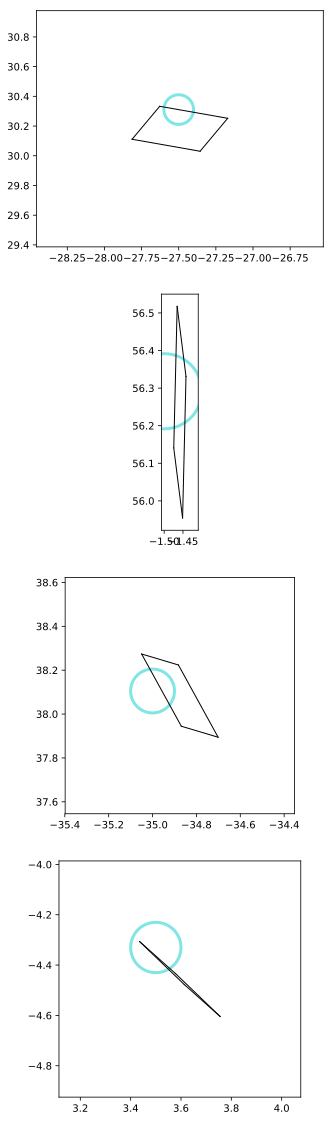

In [4]:
printSteps(exampleSteps, A, L, phr, zoomOut=False)

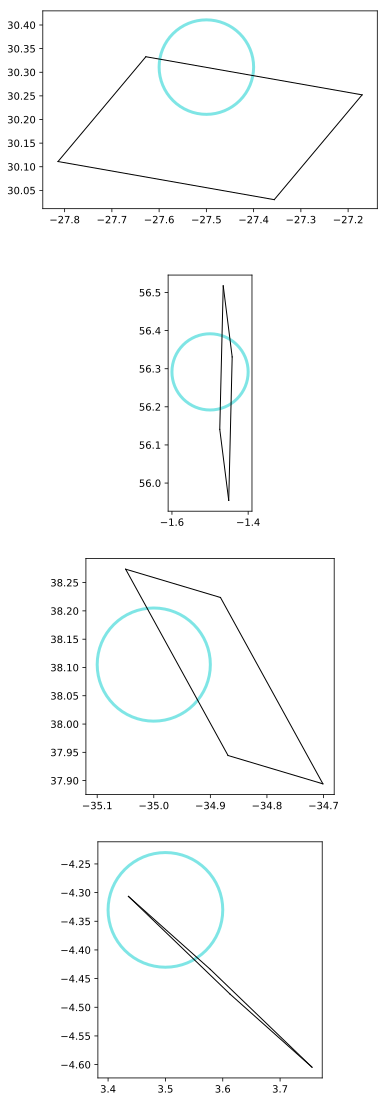

In [5]:
printSteps(exampleSteps, A, L, phr, zoomOut=True)